# Gradient Descent

In this programming exercise, you will implement the gradient descent algorithm using only numpy. DO NOT use libraries like scikit-learn or scipy.

Use the template provided in this notebook to implement gradient descent.

Use gradient descent to optimize for the parameters of linear regression, and compare the results to the least-squares solution from last week.

When done, paste the code into the moodle-quiz and answer the questions.

# importing packages

In [5]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
from typing import Callable

# Importing data

In [6]:
def load_data(name: str) -> tuple[ArrayLike, ArrayLike]:
    """Loads data from provided .npy files and returns the x and y values.

    Args:
        name (str): The file name of the .npy file to load.

    Returns:
        tuple[ArrayLike, ArrayLike]: The x and y values of the data. x and y have shape (n,).
    """
    data = np.load(name)
    x, y = data.T
    return x, y

# Plotting the data and the regression model.

In [7]:
def plot(x: ArrayLike, y: ArrayLike, w: ArrayLike = None):
    """Plot the data and linear regression model.

    Only for plotting 2D data.

    Args:
        x (ArrayLike): The input data of shape (n,).
        y (ArrayLike): The output data of shape (n,).
        w (ArrayLike, optional): The weight and bias of a linear regression. Defaults to None.
    """

    # Plot the data
    plt.plot(x, y, ".r", markersize=8, label="Samples")

    # also plot the prediction
    if w is not None:
        deg = w.shape[0]
        x_plot = np.linspace(np.min(x), np.max(x), 100)
        X_plot = np.vander(x_plot, deg)

        # set plotting range properly
        plt.ylim((np.min(y) * 1.2, np.max(y) * 1.2))

        plt.plot(
            x_plot, X_plot @ w, linewidth=5, color="tab:blue", label="Model"
        )

    plt.tight_layout()
    plt.show()

In [ ]:
def backtracking_line_search(fg: Callable[[ArrayLike], tuple[float, ArrayLike]], x_0: ArrayLike, d: ArrayLike, alpha:float=0.2, beta:float=0.8) -> ArrayLike:
    """Performs backtracking line search to find a suitable step size.

    Args:
        fg (Callable[[ArrayLike], tuple[float, ArrayLike]]): A function returning the function value and its gradient at a given point.
        x_0 (ArrayLike): The initial point.
        d (ArrayLike): The direction of the line search.
        alpha (float, optional): The condition parameter. Should be in (0, 0.5). Defaults to 0.2.
        beta (float, optional): The step parameter. Should be in (0, 1). Defaults to 0.8.

    Returns:
        ArrayLike: The new point after taking the step in the direction d.
    """
    f_0, g_0 = fg(x_0) # Compute the function value and gradient at x_0
    t = 1.0 # Initial step size
    d_0 = np.dot(g_0, d)
    if d_0 > 0: # Check if the directional derivative is positive
        raise ValueError("The direction must be a descent direction.")

    while True:
        x_new = x_0 + t * d # Compute the new point
        f_new, _ = fg(x_new) # Compute the function value at the new point
        if f_new <= f_0 + alpha * t * d_0: # Check the Armijo condition
            break
        t *= beta # Adjust the step size
    x_0 += t * d # Take step in the direction d
    return x_0

In [9]:
def gradient_descent(fg: Callable[[ArrayLike], tuple[float, ArrayLike]], x: ArrayLike, niter:int=100) -> ArrayLike:
    """Gradient descent algorithm.

    Args:
        fg (Callable[[ArrayLike], tuple[float, ArrayLike]]): The objective function.
        x (ArrayLike): The initial point.
        niter (int, optional): Number of iteration to perform. Defaults to 100.

    Returns:
        ArrayLike: The final point after performing gradient descent.
    """
    for _ in range(niter):
        f, g = fg(x)
        d = -g
        try:
            x = backtracking_line_search(fg, x, d)
        except ValueError:
            print("The direction is not descent.")
            break
    return x

In [ ]:
def regression(x: ArrayLike, y: ArrayLike) -> ArrayLike:
    """Finds the linear regression coefficients using gradient descent.

    Args:
        x (ArrayLike): The input data of shape (n,).
        y (ArrayLike): The output data of shape (n,).

    Returns:
        ArrayLike: The linear regression coefficients.
    """
    X = np.column_stack((x, np.ones(x.shape[0]))) # Add bias term

    def fg(w: ArrayLike) -> tuple[float, ArrayLike]:
        """The objective function of the regression problem.

        Args:
            w (ArrayLike): The weight vector.

        Returns:
            tuple[float, ArrayLike]: The objective function value and its gradient.
        """
        residual = X @ w - y
        f = np.sum(residual ** 2)
        g = 2 * X.T @ residual 
        return f, g

    w_0 = np.zeros(X.shape[1])
    w = gradient_descent(fg, w_0)

    return w

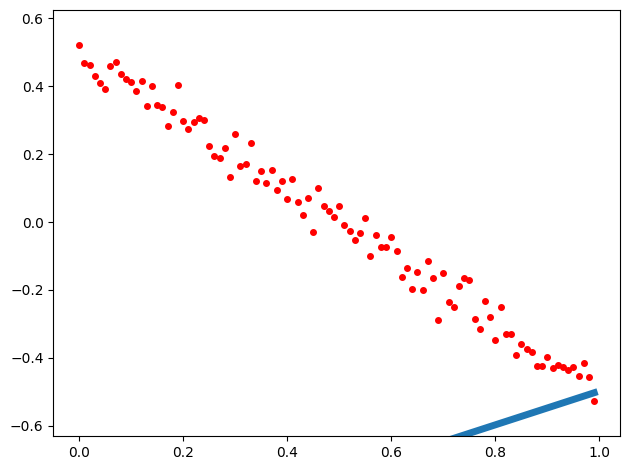

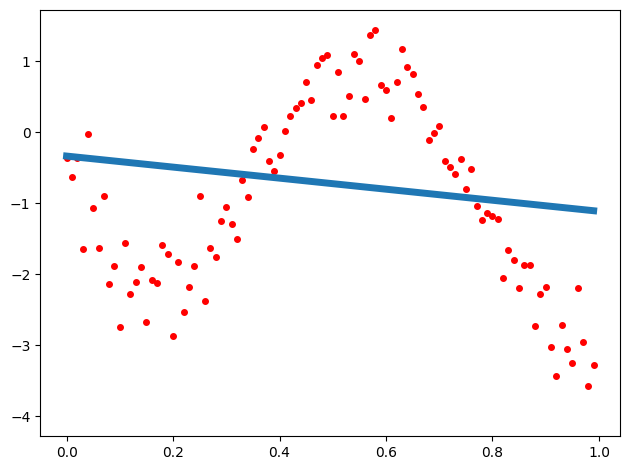

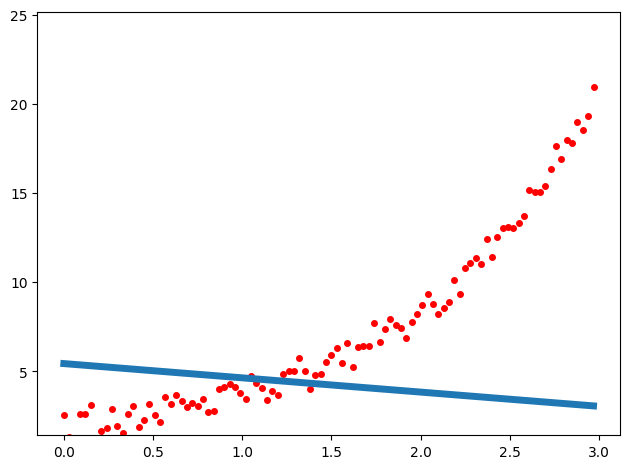

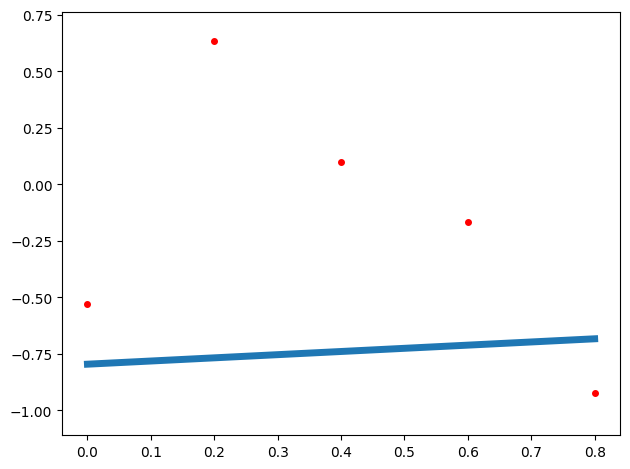

In [14]:
datasets = ["dataset0.npy", "dataset1.npy", "dataset2.npy", "dataset3.npy"]

for dataset in datasets:
    x, y = load_data(dataset)
    w = regression(x, y)
    plot(x, y, w)